# Machine Learning - Decision Tree

In this section, decision tree is used to forecast the apple prices. Example of fail tests are also included.

## ⚠️ Disclaimer

> This project is created **for educational and research purposes only**.  
> It does **not** constitute investment advice or financial recommendations.  
> All data is sourced from [Yahoo Finance](https://finance.yahoo.com/) using the `yfinance` Python package.  
> This project is **not affiliated with, endorsed by, or officially connected to Apple Inc.** in any way.

# Preprocessing and augmentation

In [ ]:
#Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Retrieving 5 years of historical Apple stock data
apple_df = yf.Ticker("AAPL").history(period="5y", interval="1d")
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00-04:00,60.849335,62.009340,60.524142,61.837036,167976400,0.0,0.0
2020-03-31 00:00:00-04:00,62.028770,63.700825,61.155124,61.710857,197002000,0.0,0.0
2020-04-01 00:00:00-04:00,59.820373,60.359121,58.031830,58.463799,176218400,0.0,0.0
2020-04-02 00:00:00-04:00,58.325473,59.492759,57.490657,59.439369,165934000,0.0,0.0
2020-04-03 00:00:00-04:00,58.922460,59.626228,57.992999,58.585136,129880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-24 00:00:00-04:00,221.000000,221.479996,218.580002,220.729996,44299500,0.0,0.0
2025-03-25 00:00:00-04:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0
2025-03-26 00:00:00-04:00,223.509995,225.020004,220.470001,221.529999,34532700,0.0,0.0


In [ ]:
#Dividing date to year, month and day columns, and resetting index
apple_df.index = pd.to_datetime(apple_df.index)
apple_df["Day_of_Week"] = apple_df.index.dayofweek
apple_df["Year"] = apple_df.index.year
apple_df["Month"] = apple_df.index.month
apple_df["Day"] = apple_df.index.day
apple_df = apple_df.reset_index(drop=True)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day_of_Week,Year,Month,Day
0,60.849335,62.009340,60.524142,61.837036,167976400,0.0,0.0,0,2020,3,30
1,62.028770,63.700825,61.155124,61.710857,197002000,0.0,0.0,1,2020,3,31
2,59.820373,60.359121,58.031830,58.463799,176218400,0.0,0.0,2,2020,4,1
3,58.325473,59.492759,57.490657,59.439369,165934000,0.0,0.0,3,2020,4,2
4,58.922460,59.626228,57.992999,58.585136,129880000,0.0,0.0,4,2020,4,3
...,...,...,...,...,...,...,...,...,...,...,...
1252,221.000000,221.479996,218.580002,220.729996,44299500,0.0,0.0,0,2025,3,24
1253,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0,1,2025,3,25
1254,223.509995,225.020004,220.470001,221.529999,34532700,0.0,0.0,2,2025,3,26
1255,221.389999,224.990005,220.559998,223.850006,37094800,0.0,0.0,3,2025,3,27


In [ ]:
#Shifting High and Low
apple_df["Previous_High"] = apple_df["High"].shift(1)
apple_df["Previous_Low"] = apple_df["Low"].shift(1)
apple_df["Previous_Volume"] = apple_df["Volume"].shift(1)
apple_df.drop(["High", "Low","Volume"], axis=1, inplace=True)

In [ ]:
apple_df

,Open,Close,Dividends,Stock Splits,Day_of_Week,Year,Month,Day,Previous_High,Previous_Low,Previous_Volume
0,60.849335,61.837036,0.0,0.0,0,2020,3,30,NaN,NaN,NaN
1,62.028770,61.710857,0.0,0.0,1,2020,3,31,62.009340,60.524142,167976400.0
2,59.820373,58.463799,0.0,0.0,2,2020,4,1,63.700825,61.155124,197002000.0
3,58.325473,59.439369,0.0,0.0,3,2020,4,2,60.359121,58.031830,176218400.0
4,58.922460,58.585136,0.0,0.0,4,2020,4,3,59.492759,57.490657,165934000.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,221.000000,220.729996,0.0,0.0,0,2025,3,24,218.839996,211.279999,94127800.0
1253,220.770004,223.750000,0.0,0.0,1,2025,3,25,221.479996,218.580002,44299500.0
1254,223.509995,221.529999,0.0,0.0,2,2025,3,26,224.100006,220.080002,34493600.0
1255,221.389999,223.850006,0.0,0.0,3,2025,3,27,225.020004,220.470001,34532700.0


In [ ]:
#Creating lags for Close price
for lag in range(1, 62):
    apple_df[f"Close_lag_{lag}"] = apple_df["Close"].shift(lag)

In [ ]:
apple_df

,Open,Close,Dividends,Stock Splits,Day_of_Week,Year,Month,Day,Previous_High,Previous_Low,...,Close_lag_52,Close_lag_53,Close_lag_54,Close_lag_55,Close_lag_56,Close_lag_57,Close_lag_58,Close_lag_59,Close_lag_60,Close_lag_61
0,60.849335,61.837036,0.0,0.0,0,2020,3,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62.028770,61.710857,0.0,0.0,1,2020,3,31,62.009340,60.524142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.820373,58.463799,0.0,0.0,2,2020,4,1,63.700825,61.155124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58.325473,59.439369,0.0,0.0,3,2020,4,2,60.359121,58.031830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.922460,58.585136,0.0,0.0,4,2020,4,3,59.492759,57.490657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,221.000000,220.729996,0.0,0.0,0,2025,3,24,218.839996,211.279999,...,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655,254.210510
1253,220.770004,223.750000,0.0,0.0,1,2025,3,25,221.479996,218.580002,...,241.944000,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655
1254,223.509995,221.529999,0.0,0.0,2,2025,3,26,224.100006,220.080002,...,242.433441,241.944000,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443
1255,221.389999,223.850006,0.0,0.0,3,2025,3,27,225.020004,220.470001,...,236.589874,242.433441,241.944000,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504


In [ ]:
#Getting to moving averages of previous days
apple_df["Previous_MA_5"] = apple_df["Close"].shift(1).rolling(window=5).mean()
apple_df["Previous_MA_20"] = apple_df["Close"].shift(1).rolling(window=20).mean()
apple_df["Previous_MA_ratio"] = apple_df["Previous_MA_5"] / apple_df["Previous_MA_20"]

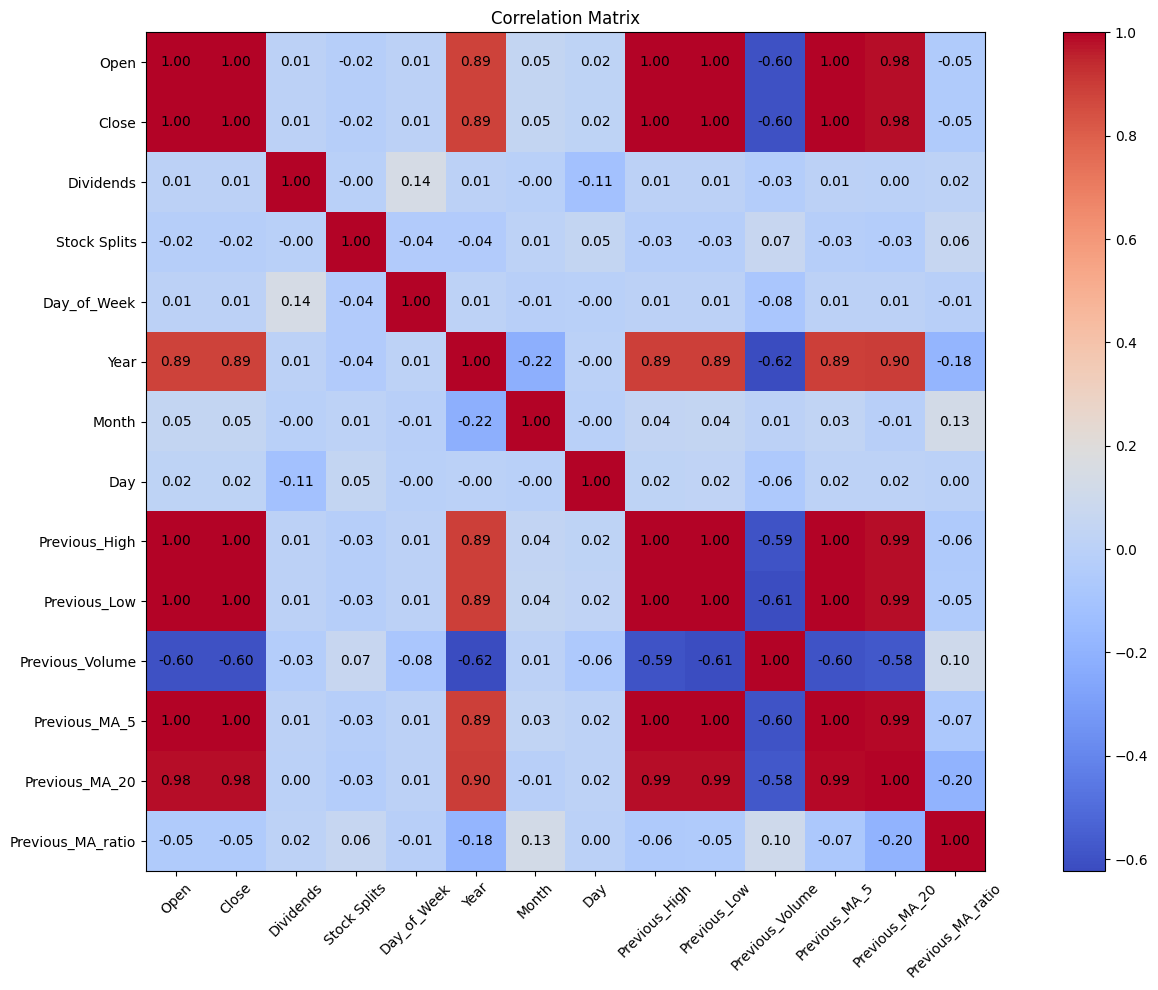

In [ ]:
cols_no_lag = [col for col in apple_df.columns if not col.startswith("Close_lag_")]
df_no_lag = apple_df[cols_no_lag]

correlation_matrix = df_no_lag.corr()
plt.figure(figsize=(16, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [ ]:
apple_df.drop(columns=["Dividends","Stock Splits"],inplace=True)

In [ ]:
"""
This is the most important part I think, because some  models can not handle(process) NaN values of the dataset.
When I tried with decision tree with NaN values R^2 became negative.
"""
apple_df.dropna(inplace=True)

# Train and Test Sets

In [ ]:
#Feature set
X = apple_df.drop(columns=["Close"])
y = apple_df["Close"]

In [ ]:
train_size = int(len(X) * 0.8) # %80 train %20 test
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

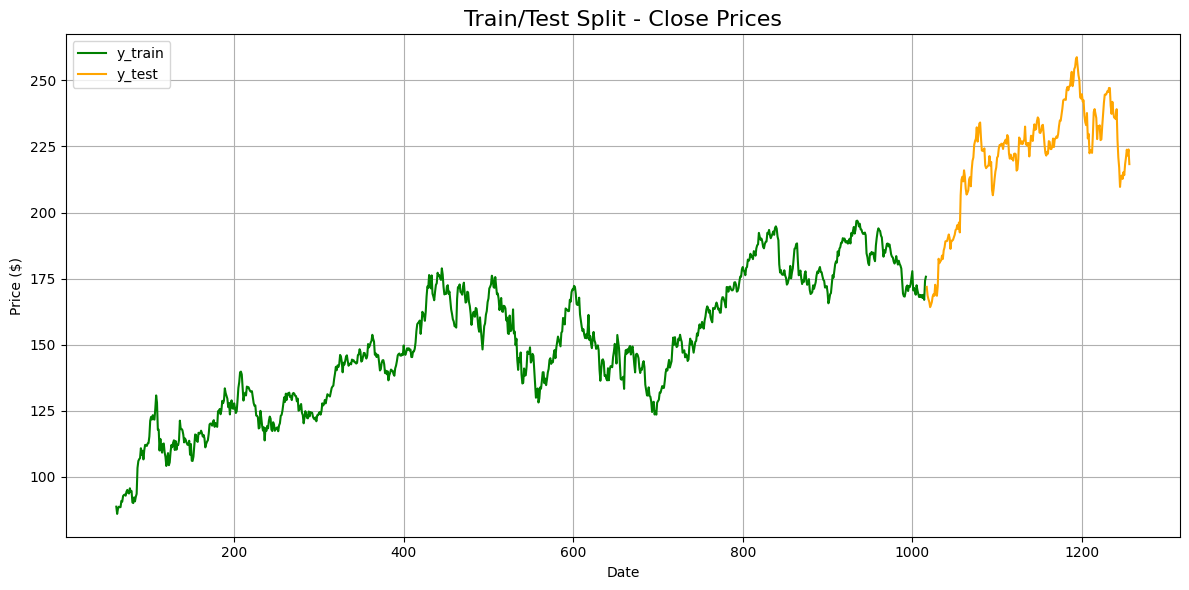

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='y_train', color='green')
plt.plot(y_test.index, y_test, label='y_test', color='orange')
plt.title("Train/Test Split - Close Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision Tree - %80 Train - %20 Test

## First Try - Failed

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [ ]:
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
#Creating some parameters to find the best model for prediction
param_grid = {
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 5],
    "max_features": ["log2", None],
}

In [ ]:
X_train

,Open,Day_of_Week,Year,Month,Day,Previous_High,Previous_Low,Previous_Volume,Close_lag_1,Close_lag_2,...,Close_lag_55,Close_lag_56,Close_lag_57,Close_lag_58,Close_lag_59,Close_lag_60,Close_lag_61,Previous_MA_5,Previous_MA_20,Previous_MA_ratio
61,87.771280,3,2020,6,25,89.739865,87.240800,192623200.0,87.615540,89.189934,...,62.958221,63.695961,58.585136,59.439369,58.463799,61.710857,61.837036,86.963884,82.720598,1.051297
62,88.674049,4,2020,6,26,88.817621,87.009637,137522400.0,88.778687,87.615540,...,64.569626,62.958221,63.695961,58.585136,59.439369,58.463799,61.710857,87.601915,83.287448,1.051802
63,85.958425,0,2020,6,29,88.895486,85.902449,205256800.0,86.050888,88.778687,...,65.035568,64.569626,62.958221,63.695961,58.585136,59.439369,58.463799,87.792203,83.721680,1.048620
64,87.620413,1,2020,6,30,88.128985,85.479053,130646000.0,88.034081,86.050888,...,66.312050,65.035568,64.569626,62.958221,63.695961,58.585136,59.439369,87.933826,84.207500,1.044252
65,88.846815,2,2020,7,1,89.056101,87.600949,140223200.0,88.768959,88.034081,...,69.660995,66.312050,65.035568,64.569626,62.958221,63.695961,58.585136,87.849631,84.711935,1.037040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,168.235616,0,2024,4,8,169.589211,168.155976,42055200.0,168.783020,168.026611,...,187.504227,181.589752,182.534103,184.810410,184.482361,185.078812,184.035065,168.587946,171.084664,0.985407
1013,167.907162,1,2024,4,9,168.404816,167.449336,37425500.0,167.658340,168.783020,...,190.416748,187.504227,181.589752,182.534103,184.810410,184.482361,185.078812,168.273431,170.971200,0.984221
1014,168.006696,2,2024,4,10,169.280681,167.558816,42451200.0,168.872604,167.658340,...,192.732834,190.416748,187.504227,181.589752,182.534103,184.810410,184.482361,168.438654,170.817923,0.986071
1015,167.548852,3,2024,4,11,168.295327,166.324636,49709300.0,166.991486,168.872604,...,194.015152,192.732834,190.416748,187.504227,181.589752,182.534103,184.810410,168.066412,170.546704,0.985457


In [ ]:
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
print(X_train.shape)
print(y_train.shape)

(956, 72)
(956,)


In [ ]:
y_pred_decision = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

R^2 is -1.7965022616212645 
 RMSE is 34.71346222035735 
 MAPE is 0.132420466487827


<ipython-input-23-b8d00a11c0cf>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


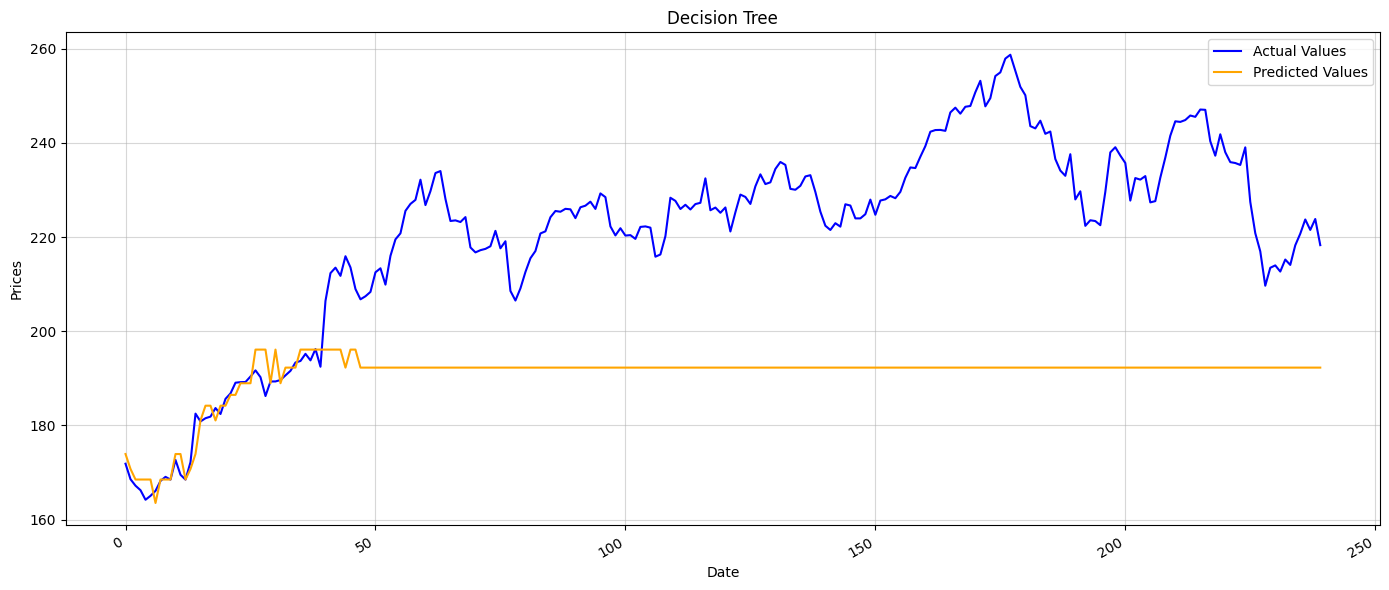

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## Extending grid search parameters - Failed

In [ ]:
#Extending parameters
param_grid = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["log2", None]
}
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_decision = best_model.predict(X_test)
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
R^2 is -1.7965022616212645 
 RMSE is 34.71346222035735 
 MAPE is 0.132420466487827


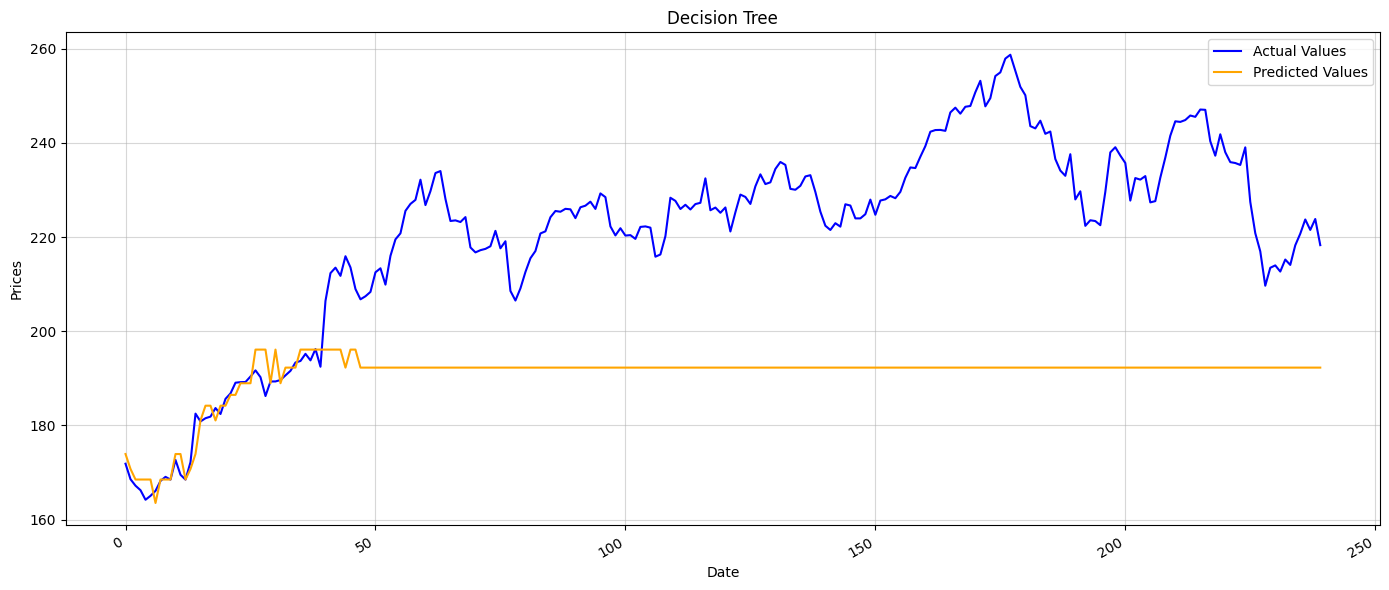

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## Reducing number of columns and extending grid search - Failed

In [ ]:
importances = best_model.feature_importances_
features = X_train.columns
sorted_features = sorted(zip(importances, features), reverse=True)
for score, name in sorted_features[:10]:
    print(f"{name}: {score:.4f}")

Close_lag_1: 0.7017
Open: 0.2315
Previous_Low: 0.0626
Close_lag_61: 0.0037
Close_lag_25: 0.0002
Close_lag_30: 0.0001
Close_lag_34: 0.0001
Previous_High: 0.0001
Previous_MA_ratio: 0.0000
Year: 0.0000


In [ ]:
top_features = [name for score, name in sorted_features[:10]]
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [ ]:
X_train_reduced

,Close_lag_1,Open,Previous_Low,Close_lag_61,Close_lag_25,Close_lag_30,Close_lag_34,Previous_High,Previous_MA_ratio,Year
61,87.615540,87.771280,87.240800,61.837036,77.680153,74.862305,73.711319,89.739865,1.051297,2020
62,88.778687,88.674049,87.009637,61.710857,77.100998,75.322220,75.465790,88.817621,1.051802,2020
63,86.050888,85.958425,85.902449,58.463799,77.597397,74.876900,76.653267,88.895486,1.048620,2020
64,88.034081,87.620413,85.479053,59.439369,77.071800,76.641083,75.777252,88.128985,1.044252,2020
65,88.768959,88.846815,87.600949,58.585136,77.407600,76.198219,74.862305,89.056101,1.037040,2020
...,...,...,...,...,...,...,...,...,...,...
1012,168.783020,168.235616,168.155976,184.035065,178.815674,181.662231,181.453201,169.589211,0.985407,2024
1013,167.658340,167.907162,167.449336,185.078812,174.277084,180.308609,180.706741,168.404816,0.984221,2024
1014,168.872604,168.006696,167.558816,184.482361,169.320511,181.771713,181.463181,169.280681,0.986071,2024
1015,166.991486,167.548852,166.324636,184.810410,168.325180,180.567398,183.503540,168.295327,0.985457,2024


In [ ]:
#Extending parameters
param_grid = {
    "max_depth": [5, 10, 20, 40, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_decision = best_model.predict(X_test_reduced)
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
R^2 is -1.7965022616212645 
 RMSE is 34.71346222035735 
 MAPE is 0.132420466487827


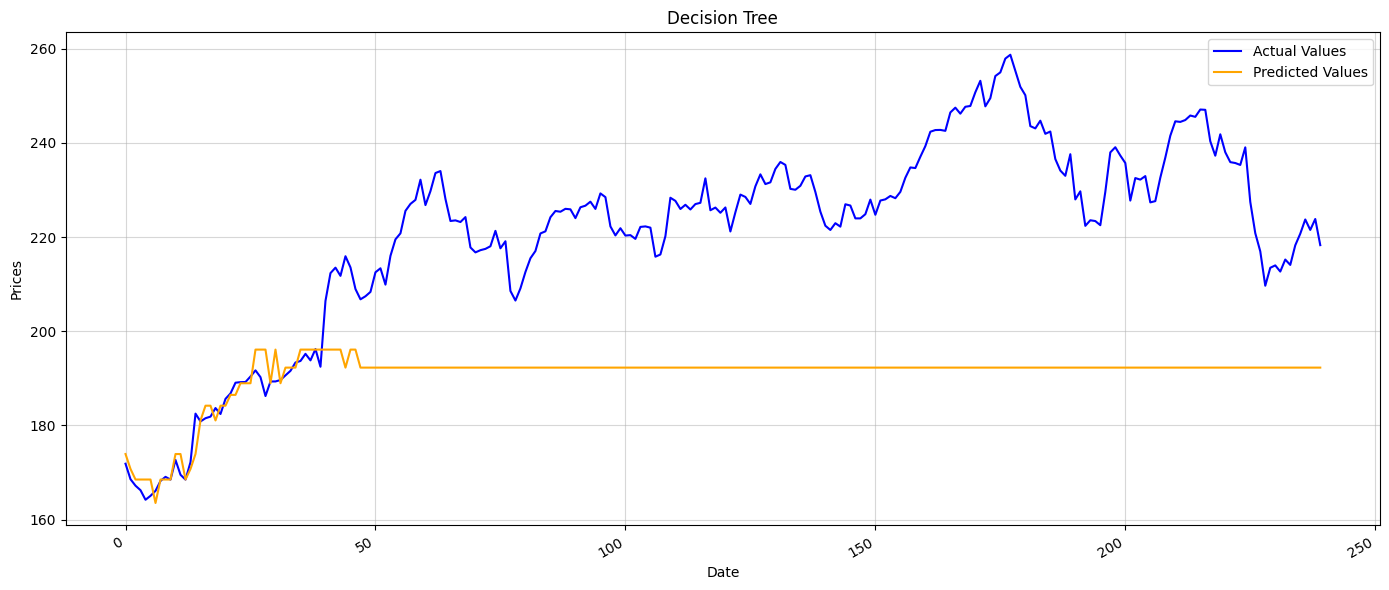

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
print("Training set 'Close' range:", y_train.min(), "to", y_train.max())
print("Test set 'Close' range:", y_test.min(), "to", y_test.max())

Training set 'Close' range: 86.05088806152344 to 196.92767333984375
Test set 'Close' range: 164.2245635986328 to 258.7355041503906


## Reason of Fail

As you can see the training set range is between 86 to 200. However, test set range is between 164 to 259. Decision Tree only make prediction in training set range. In above models, the training set range is less than test set. So model predicted as a straight line.

# Decision Tree - Increaing Train Set

## %90 Train %10Test

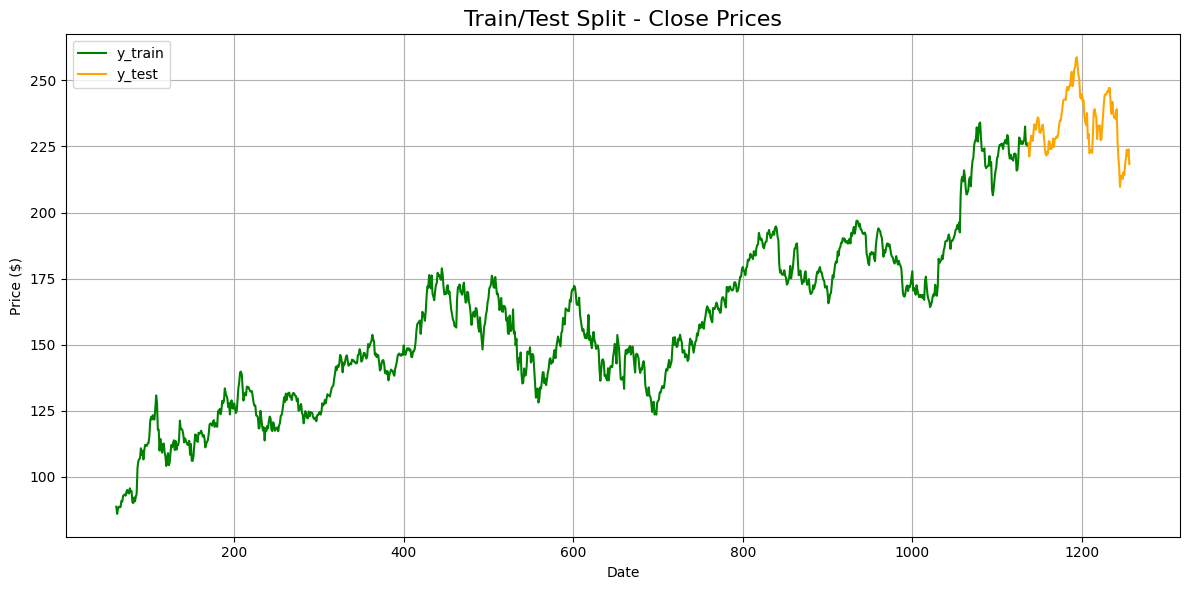

In [ ]:
#Increaing train size 80 to 90
train_size = int(len(X) * 0.9) # %00 train %10 test
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='y_train', color='green')
plt.plot(y_test.index, y_test, label='y_test', color='orange')
plt.title("Train/Test Split - Close Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Creating some parameters to find the best model for prediction
param_grid = {
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 5],
    "max_features": ["log2", None],
}
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_decision = best_model.predict(X_test)
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
R^2 is -0.40156874337939197 
 RMSE is 12.628966802163381 
 MAPE is 0.039205968397800994


<ipython-input-37-82f16146a702>:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


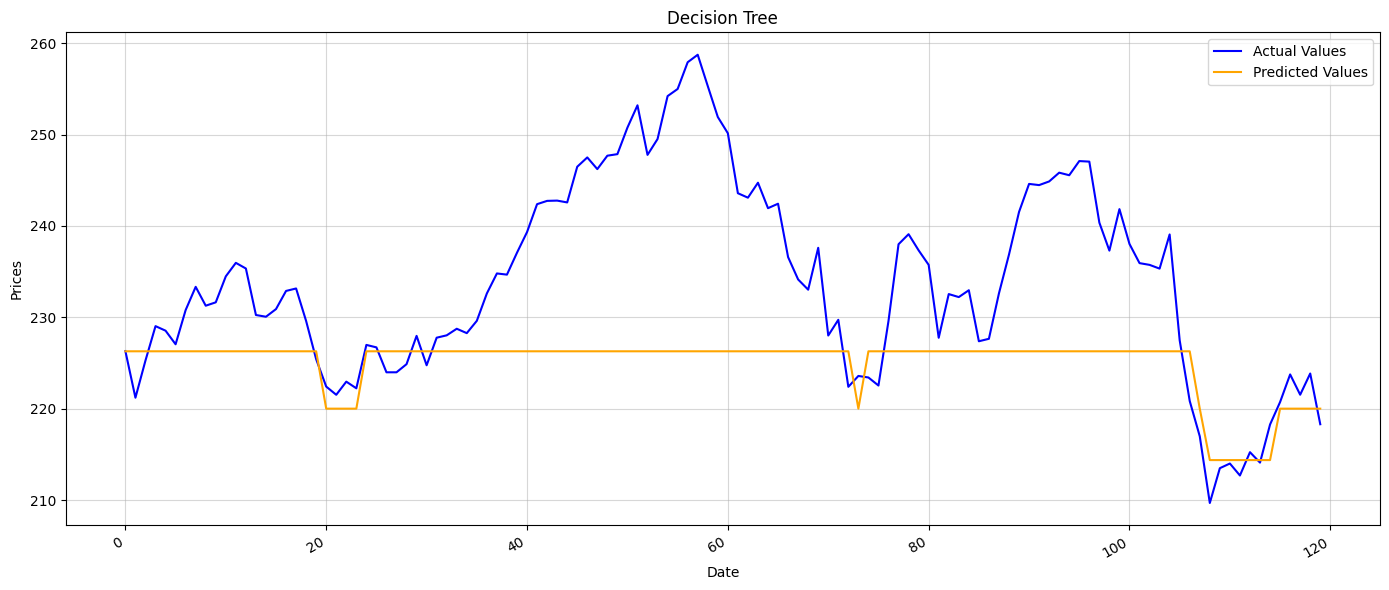

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
print("Training set 'Close' range:", y_train.min(), "to", y_train.max())
print("Test set 'Close' range:", y_test.min(), "to", y_test.max())

Training set 'Close' range: 86.05088806152344 to 234.03343200683594
Test set 'Close' range: 209.67999267578125 to 258.7355041503906


## %97 Train, %3 Test

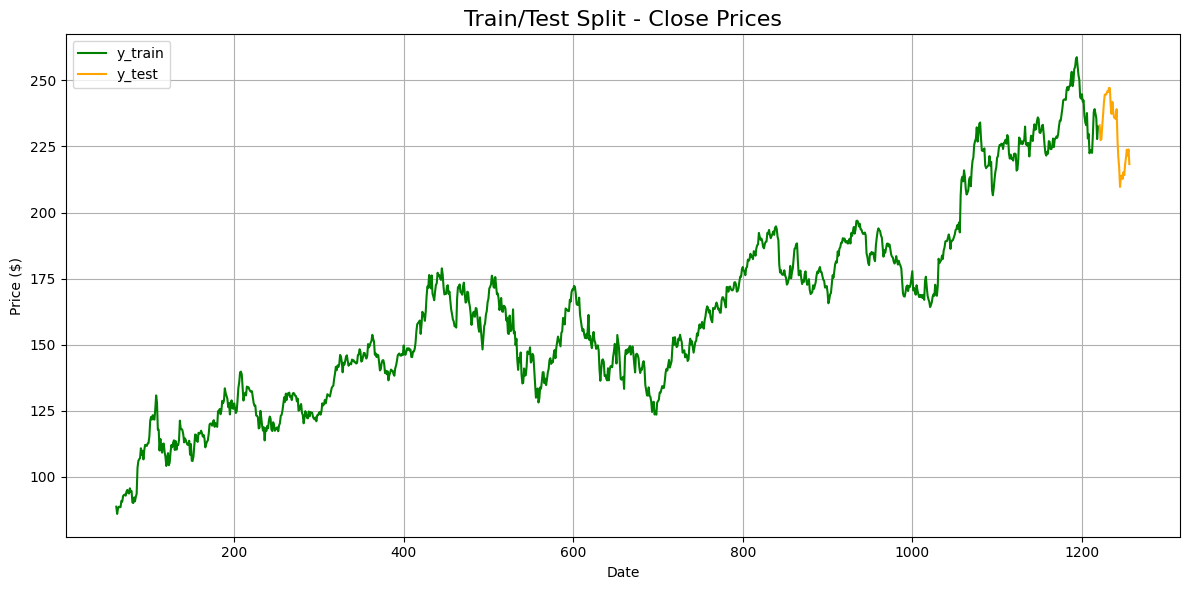

In [ ]:
#Increaing train size 90 to 97
train_size = int(len(X) * 0.97) # %97 train %3 test
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='y_train', color='green')
plt.plot(y_test.index, y_test, label='y_test', color='orange')
plt.title("Train/Test Split - Close Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Training set 'Close' range:", y_train.min(), "to", y_train.max())
print("Test set 'Close' range:", y_test.min(), "to", y_test.max())

Training set 'Close' range: 86.05088806152344 to 258.7355041503906
Test set 'Close' range: 209.67999267578125 to 247.10000610351562


In [ ]:
#Creating some parameters to find the best model for prediction
param_grid = {
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 5],
    "max_features": ["log2", None],
}
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_decision = best_model.predict(X_test)
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
R^2 is 0.7218019523884167 
 RMSE is 6.182947967646416 
 MAPE is 0.021357270729960125


<ipython-input-47-82f16146a702>:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


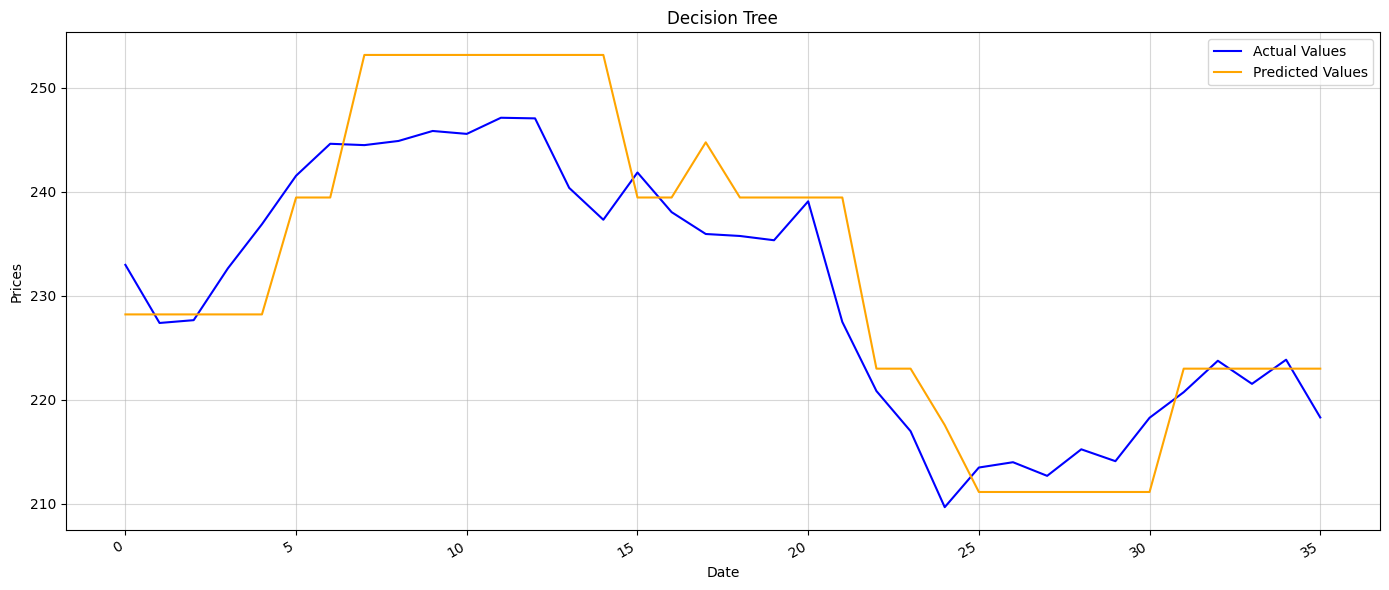

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## %99 Train, %1Test

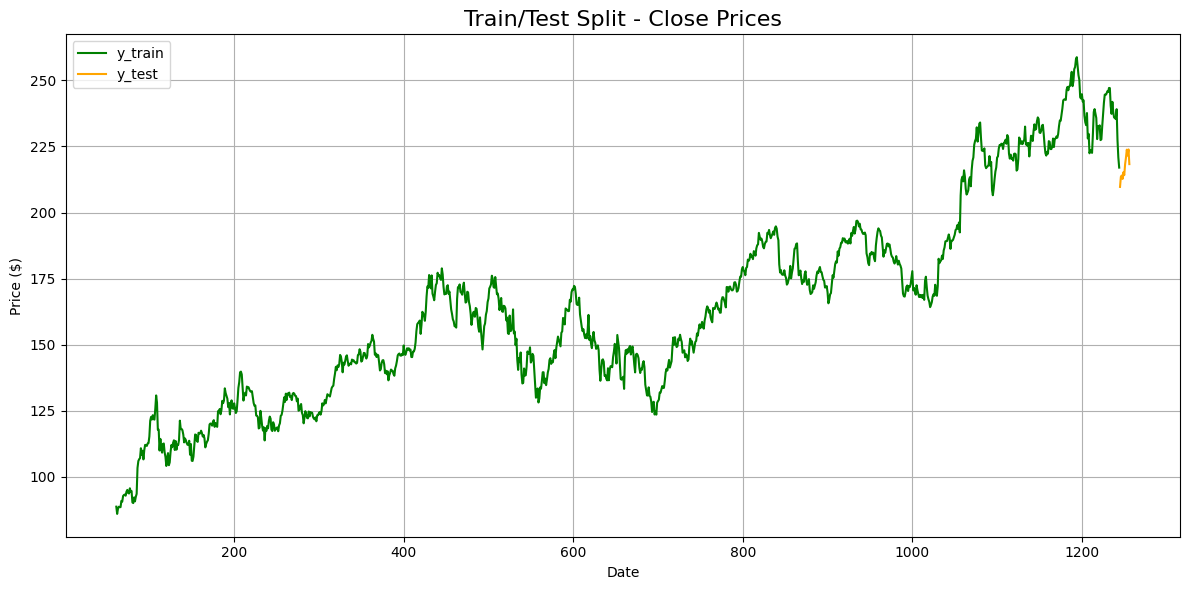

In [ ]:
#Increaing train size 97 to 99
train_size = int(len(X) * 0.99) # %99 train %1 test
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='y_train', color='green')
plt.plot(y_test.index, y_test, label='y_test', color='orange')
plt.title("Train/Test Split - Close Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Training set 'Close' range:", y_train.min(), "to", y_train.max())
print("Test set 'Close' range:", y_test.min(), "to", y_test.max())

Training set 'Close' range: 86.05088806152344 to 258.7355041503906
Test set 'Close' range: 209.67999267578125 to 223.85000610351562


In [ ]:
#Creating some parameters to find the best model for prediction
param_grid = {
    "max_depth": [5, 10, 20, 40, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}
#Grid Search
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_decision = best_model.predict(X_test)
y_test = y_test.ravel()
r2_dec= r2_score(y_test, y_pred_decision)
rmse_dec = np.sqrt(mean_squared_error(y_test, y_pred_decision))
mape_dec = mean_absolute_percentage_error(y_test, y_pred_decision)
print(f"R^2 is {r2_dec} \n RMSE is {rmse_dec} \n MAPE is {mape_dec}")

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
R^2 is 0.2230445758176497 
 RMSE is 3.9005775826264677 
 MAPE is 0.014945995850093414


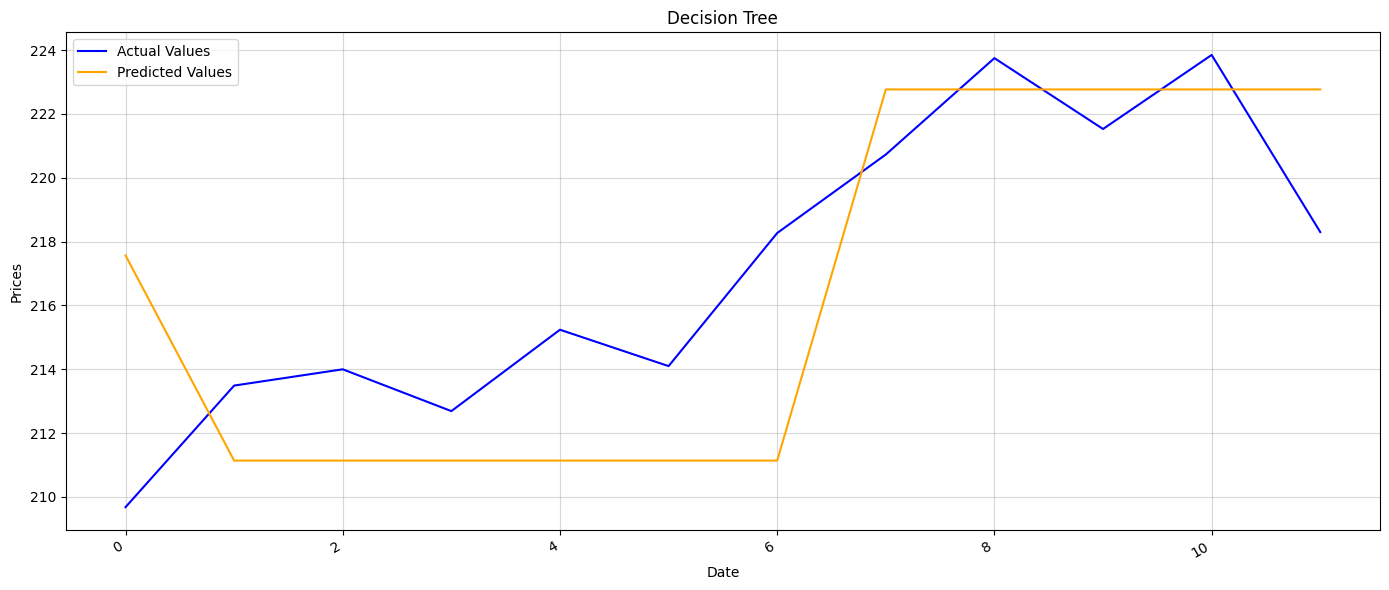

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Values", color="blue")
plt.plot(y_pred_decision, label="Predicted Values", color="orange")
plt.title("Decision Tree")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()